In [485]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.preprocessing as pp
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression

In [616]:
data = pd.read_csv("Microarray.csv")
data

ALL     ALL.1     ALL.2     ALL.3     ALL.4     ALL.5     ALL.6  \
0    -1.533622 -0.867610 -0.433172 -1.671903 -1.187689 -1.127234 -1.045409   
1    -1.235673 -1.275501 -1.184492 -1.596424 -1.335256 -1.113730 -0.800880   
2    -0.333983  0.375927 -0.459196 -1.422571 -0.797493 -1.362768 -0.671954   
3     0.488702  0.444011  0.436264  0.193353  0.235632 -0.360312  0.184941   
4    -1.300893 -1.229660 -1.325882 -1.818329 -1.311206 -1.513975 -1.651624   
...        ...       ...       ...       ...       ...       ...       ...   
7123  1.295992 -0.218494  1.132893  1.113077  0.719203  1.490610  0.483163   
7124  0.733853  0.378380  0.475669  0.148928  0.419502  1.000031  0.258833   
7125 -0.301622 -0.663166 -0.530138 -0.625945 -0.487514 -0.172972 -0.052590   
7126  0.133657 -0.663166  1.566946  0.871972  0.358999  0.080430  0.029891   
7127 -0.825596 -0.611045 -0.805978 -1.037246 -0.742858 -0.670192 -0.758939   

         ALL.7     ALL.8     ALL.9  ...    AML.15    AML.16    AML.17  \
0    -0.106917 -1.198796 -1.190899  ... -0.436650 -1.274708 -0.681458   
1    -0.745177 -0.849312 -1.190899  ... -0.915483 -1.354363 -0.653559   
2    -1.175674  0.320813  0.646610  ... -0.736156 -0.022153 -0.037455   
3     0.425653  0.333983  0.235270  ...  0.083781  0.356562  0.416241   
4    -1.339555 -0.593132  0.133302  ... -1.547444 -1.264475 -1.512318   
...        ...       ...       ...  ...       ...       ...       ...   
7123  1.433292  0.737309  0.633018  ...  1.097533  1.154533  1.401608   
7124 -0.498831 -0.657700 -0.373663  ...  0.496841  0.390495  0.379136   
7125 -0.512817 -1.005845 -1.245923  ... -0.340496 -0.419886 -0.502218   
7126  1.553879 -0.144841  0.129578  ...  1.586444  0.216334  1.708574   
7127 -0.959684 -1.044802 -1.204950  ... -0.779262 -0.428349 -0.714884   

        AML.18    AML.19    AML.20    AML.21    AML.22    AML.23    AML.24  
0    -0.876610 -0.624022 -0.431628 -1.435259 -0.671954 -1.013161 -0.969482  
1    -1.096250 -1.066594 -1.335256 -1.204586 -0.751457 -0.889592 -1.080988  
2    -0.567335 -1.100749 -0.552938 -0.948874 -0.231657 -0.742163 -0.779500  
3     0.533986  0.227505  0.416816  0.408202  0.326556  0.361813  0.298864  
4    -1.469583 -1.283472 -0.977672 -1.090178 -1.545120 -1.174272 -1.443183  
...        ...       ...       ...       ...       ...       ...       ...  
7123  1.442685  1.097212  0.616776  0.904313  0.861478  1.183783  1.500833  
7124  0.833781  0.298680 -0.161740  0.254654  0.558272  0.290234  0.159425  
7125 -0.455682 -0.480793 -0.518640 -0.603435 -0.637751 -0.395623 -0.584142  
7126  1.710849  0.844280  1.771676  0.503216  0.079548  0.311388  0.793874  
7127 -0.562798 -0.825843 -0.591665 -0.704030 -0.671954 -0.585602 -0.581017  

[7128 rows x 72 columns]

In the following I will look at the applications of the elastic net with both simulated and real world data.In the simulation part I will simuled data from the true linear model $y = X \beta + \epsilon$ with $\epsilon \sim N(0,\sigma)$.

1.) Variable Selection:
I simulate a training data set of 50(n) observations. Here we set $\beta = (3,2,7,0,0,0,0,8)^T$ and sigma to 1


In [610]:
np.random.seed(31)
n = 150
sigma = 0.5
x1 = np.random.normal(0,1,n)
x2 = np.random.normal(0,1,n)
x3 = np.random.normal(0,1,n)
x4 = np.random.normal(0,1,n)
x5 = np.random.normal(0,1,n)
x6 = np.random.normal(0,1,n)
x7 = np.random.normal(0,1,n)
x8 = np.random.normal(0,1,n)
y = np.random.normal(3*x1 + 2*x2 +7*x3+ 1*x8, sigma,n)
X = np.transpose(np.array([x1,x2,x3,x4,x5,x6,x7,x8]))


In [611]:
OLS = LinearRegression().fit(X,y)
print("OLS:")
print(OLS.coef_)
Lasso = LassoCV(normalize = True).fit(X,y)
print("Lasso:")
print(Lasso.coef_)
Ridge = RidgeCV(normalize = True).fit(X,y)
print("Ridge:")
print(Ridge.coef_)
l1ratio = [0.8]
ElasticNet = ElasticNetCV(l1_ratio = l1ratio, cv = 10, normalize = True).fit(X,y)
print("Elastic Net:")
print(ElasticNet.coef_)

OLS:
[ 3.04158769e+00  2.06608853e+00  6.96948477e+00  1.69008424e-02
 -4.35105718e-03  7.80175390e-03 -1.69413375e-02  1.00095354e+00]
Lasso:
[ 3.01914921  2.04554651  6.95279682  0.         -0.          0.
 -0.          0.97457422]
Ridge:
[2.82702563e+00 1.95708135e+00 6.35580050e+00 2.58448337e-02
 2.74587921e-03 8.40573813e-02 1.99277950e-02 8.74039288e-01]
Elastic Net:
[ 2.97883096  2.03228098  6.80403957  0.01253205 -0.          0.02248958
 -0.          0.95848321]


We can see that the Elastic Net performs variable selection as it sets several insignificant varibles to exactly zero, but keeps more variables in the model compared to lasso regression due to the grouping effect.

2.) Variable Selection
To demonstrate the grouping effect we first simulate two variables $Z_1,Z_2 \sim U(-10,10)$ and then define the predictors in the following way : $(x_1,x_2,x_3,x_4,x_6)^T = (Z_1 + \epsilon, Z_1 + \epsilon, Z_2 + \epsilon, Z_2 + \epsilon, Z_2 + \epsilon, -Z_1 + \epsilon)^T$ with $\epsilon \sim N(0,0.001)$ and simulate the dependent variable as $y \sim N(20\cdot Z_1 + 0,4 \cdot Z_2, 10)$. Now we have to groups of variables $x_1,x_2,x_6$ and $x_3, x_4, x_5$ that have a correlation of almost 1 (or -1) within their group and are practically uncorellated between the groups. And the group with $Z_1$ is much more significant and should receive a higher value. 

In [614]:
np.random.seed(33)
n_g = 200
sigma = 10
Z1 = np.random.uniform(-10,10,n_g)
Z2 = np.random.uniform(-10,10,n_g)
x_1 = Z1 + np.random.normal(0, 0.01,n_g)
x_2 = Z1 + np.random.normal(0, 0.01,n_g)
x_3 = Z2 + np.random.normal(0, 0.01,n_g)
x_4 = Z2 + np.random.normal(0, 0.01,n_g)
x_5 = Z2 + np.random.normal(0, 0.01,n_g)
x_6 = -Z1 + np.random.normal(0, 0.01,n_g)
y_gr = np.random.normal(20* Z1 + 0.4 * Z2, sigma)
X_gr = np.transpose(np.matrix([x_1,x_2,x_3,x_4,x_5,x_6]))

In [615]:
Lasso = LassoCV(normalize = True).fit(X_gr,y_gr)
print("Lasso:")
print(Lasso.coef_)
l1ratio = [0.5]
ElasticNet = ElasticNetCV(l1_ratio = l1ratio, cv = 10, normalize = True).fit(X_gr,y_gr)
print("Elastic Net:")
print(ElasticNet.coef_)

Lasso:
[ 1.99950959e+01  0.00000000e+00  4.86274170e-01  0.00000000e+00
  9.23141158e-05 -0.00000000e+00]
Elastic Net:
[ 4.38119619  4.38085415  0.17553652  0.17574134  0.17592779 -4.38169939]


As we can see the elastic net assigns the variables of the same groups a similar value 
(which demonstrates the grouping effect), were the lasso does not recognize these groups as it assigns them different values.

In [474]:
X_train = np.transpose(data.iloc[:,:36])
X_test = np.transpose(data.iloc[:,36:])
#ALL: 1 / AML = 0
y_train = np.array(np.ones(36))
y_train[20:34] = 0
y_test = np.array(np.ones(36))
y_test[25:] = 0

<AxesSubplot:>

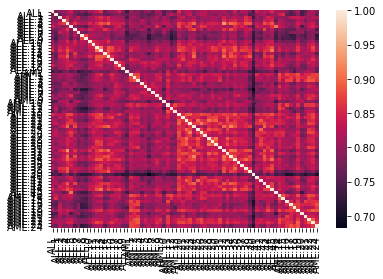

In [484]:
import seaborn as sns
corMat = data.corr()
sns.heatmap(corMat, xticklabels=corMat.columns, yticklabels=corMat.columns, annot=False)

In [478]:
def classificationerror(y_pred,y_true):
    for i in range (0,len(y_pred)):
        if y_pred[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return sum(y_pred == y_true)/36
def selectedVar(model):
    h = sum(model.coef_ == 0)
    return (7128 - h)

In [617]:
OLS_microarray = LinearRegression(normalize = True).fit(X_train,y_train)
y_pred1 = OLS_microarray.predict(X_test)
print(y_pred1)
print(classificationerror(y_pred1,y_test))
print(selectedVar(OLS_microarray))

[0.88267182 0.84712323 0.91552316 0.81266586 0.72703817 0.78919289
 0.85925449 0.72800925 0.84213499 0.59844043 1.10111452 0.779407
 1.09529739 0.97129223 0.69398871 0.74242173 0.95319017 1.20888869
 0.92183671 0.78487037 0.82314015 0.93939013 0.80202321 0.96579906
 0.76544913 0.22016285 0.37231    0.05673071 0.16546761 0.35578033
 0.4080644  0.32634992 0.09786414 0.223033   0.45932975 0.20610437]
1.0
7128


0.9722222222222222


In [481]:
lasso_ma = LassoCV(normalize = True).fit(X_train,y_train)
print("Lasso:")
y_pred2 = lasso_ma.predict(X_test)
print(classificationerror(y_pred2,y_test))
print(selectedVar(lasso_ma))

###########
ridge_ma = RidgeCV(normalize = True).fit(X_train,y_train)
print("Ridge:")
y_pred3 = ridge_ma.predict(X_test)
print(classificationerror(y_pred3,y_test))
print(selectedVar(ridge_ma))
###########
l1ratio = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
ElasticNet_ma = ElasticNetCV(l1_ratio = l1ratio, cv = 10, normalize = True).fit(X_train,y_train)
print("Elastic Net:")
y_pred4 = ElasticNet_ma.predict(X_test)
print(classificationerror(y_pred4,y_test))
print(selectedVar(ElasticNet_ma))

Lasso:
0.9166666666666666
24
Ridge:
1.0
7128
Elastic Net:
0.9722222222222222
54
